## 1.Check eligibility of the Customer given the inputs described above.

## Read training data

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
A = pd.read_csv("E:/Data Science/NN Mini Project/training_set.csv")

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
A.shape

(614, 13)

## Missing Data Treatment

In [10]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
from ml_functions import Missing_data
md = Missing_data()
md.replacer(A)

In [14]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
A[["Loan_ID"]].value_counts()

Loan_ID 
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [18]:
A = A.drop(labels=["Loan_ID"],axis=1)

In [20]:
A.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00,0.0,146.41,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54,1508.0,128.00,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00,0.0,66.00,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.00,2358.0,120.00,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.00,0.0,141.00,360.0,1.0,Urban,Y


## Remove special Characters

In [23]:
A[["Dependents"]].value_counts()

Dependents
0             360
1             102
2             101
3+             51
Name: count, dtype: int64

In [25]:
a = []
for i in A["Dependents"]:
    a.append(i.replace("+",""))

In [27]:
b=0
for i in a:
    A.iloc[b,2] = i
    b = b+1

In [29]:
A[["Dependents"]]

,Dependents
0,0
1,1
2,0
3,0
4,0
...,...
609,0
610,3
611,1
612,2


In [31]:
train_data = A

## Declare X and Y column

In [34]:
X = train_data.drop(labels=["Loan_Status"],axis=1)
Y = train_data[["Loan_Status"]]

## EDA (Univariant,Bivariant)

## a)Univariant

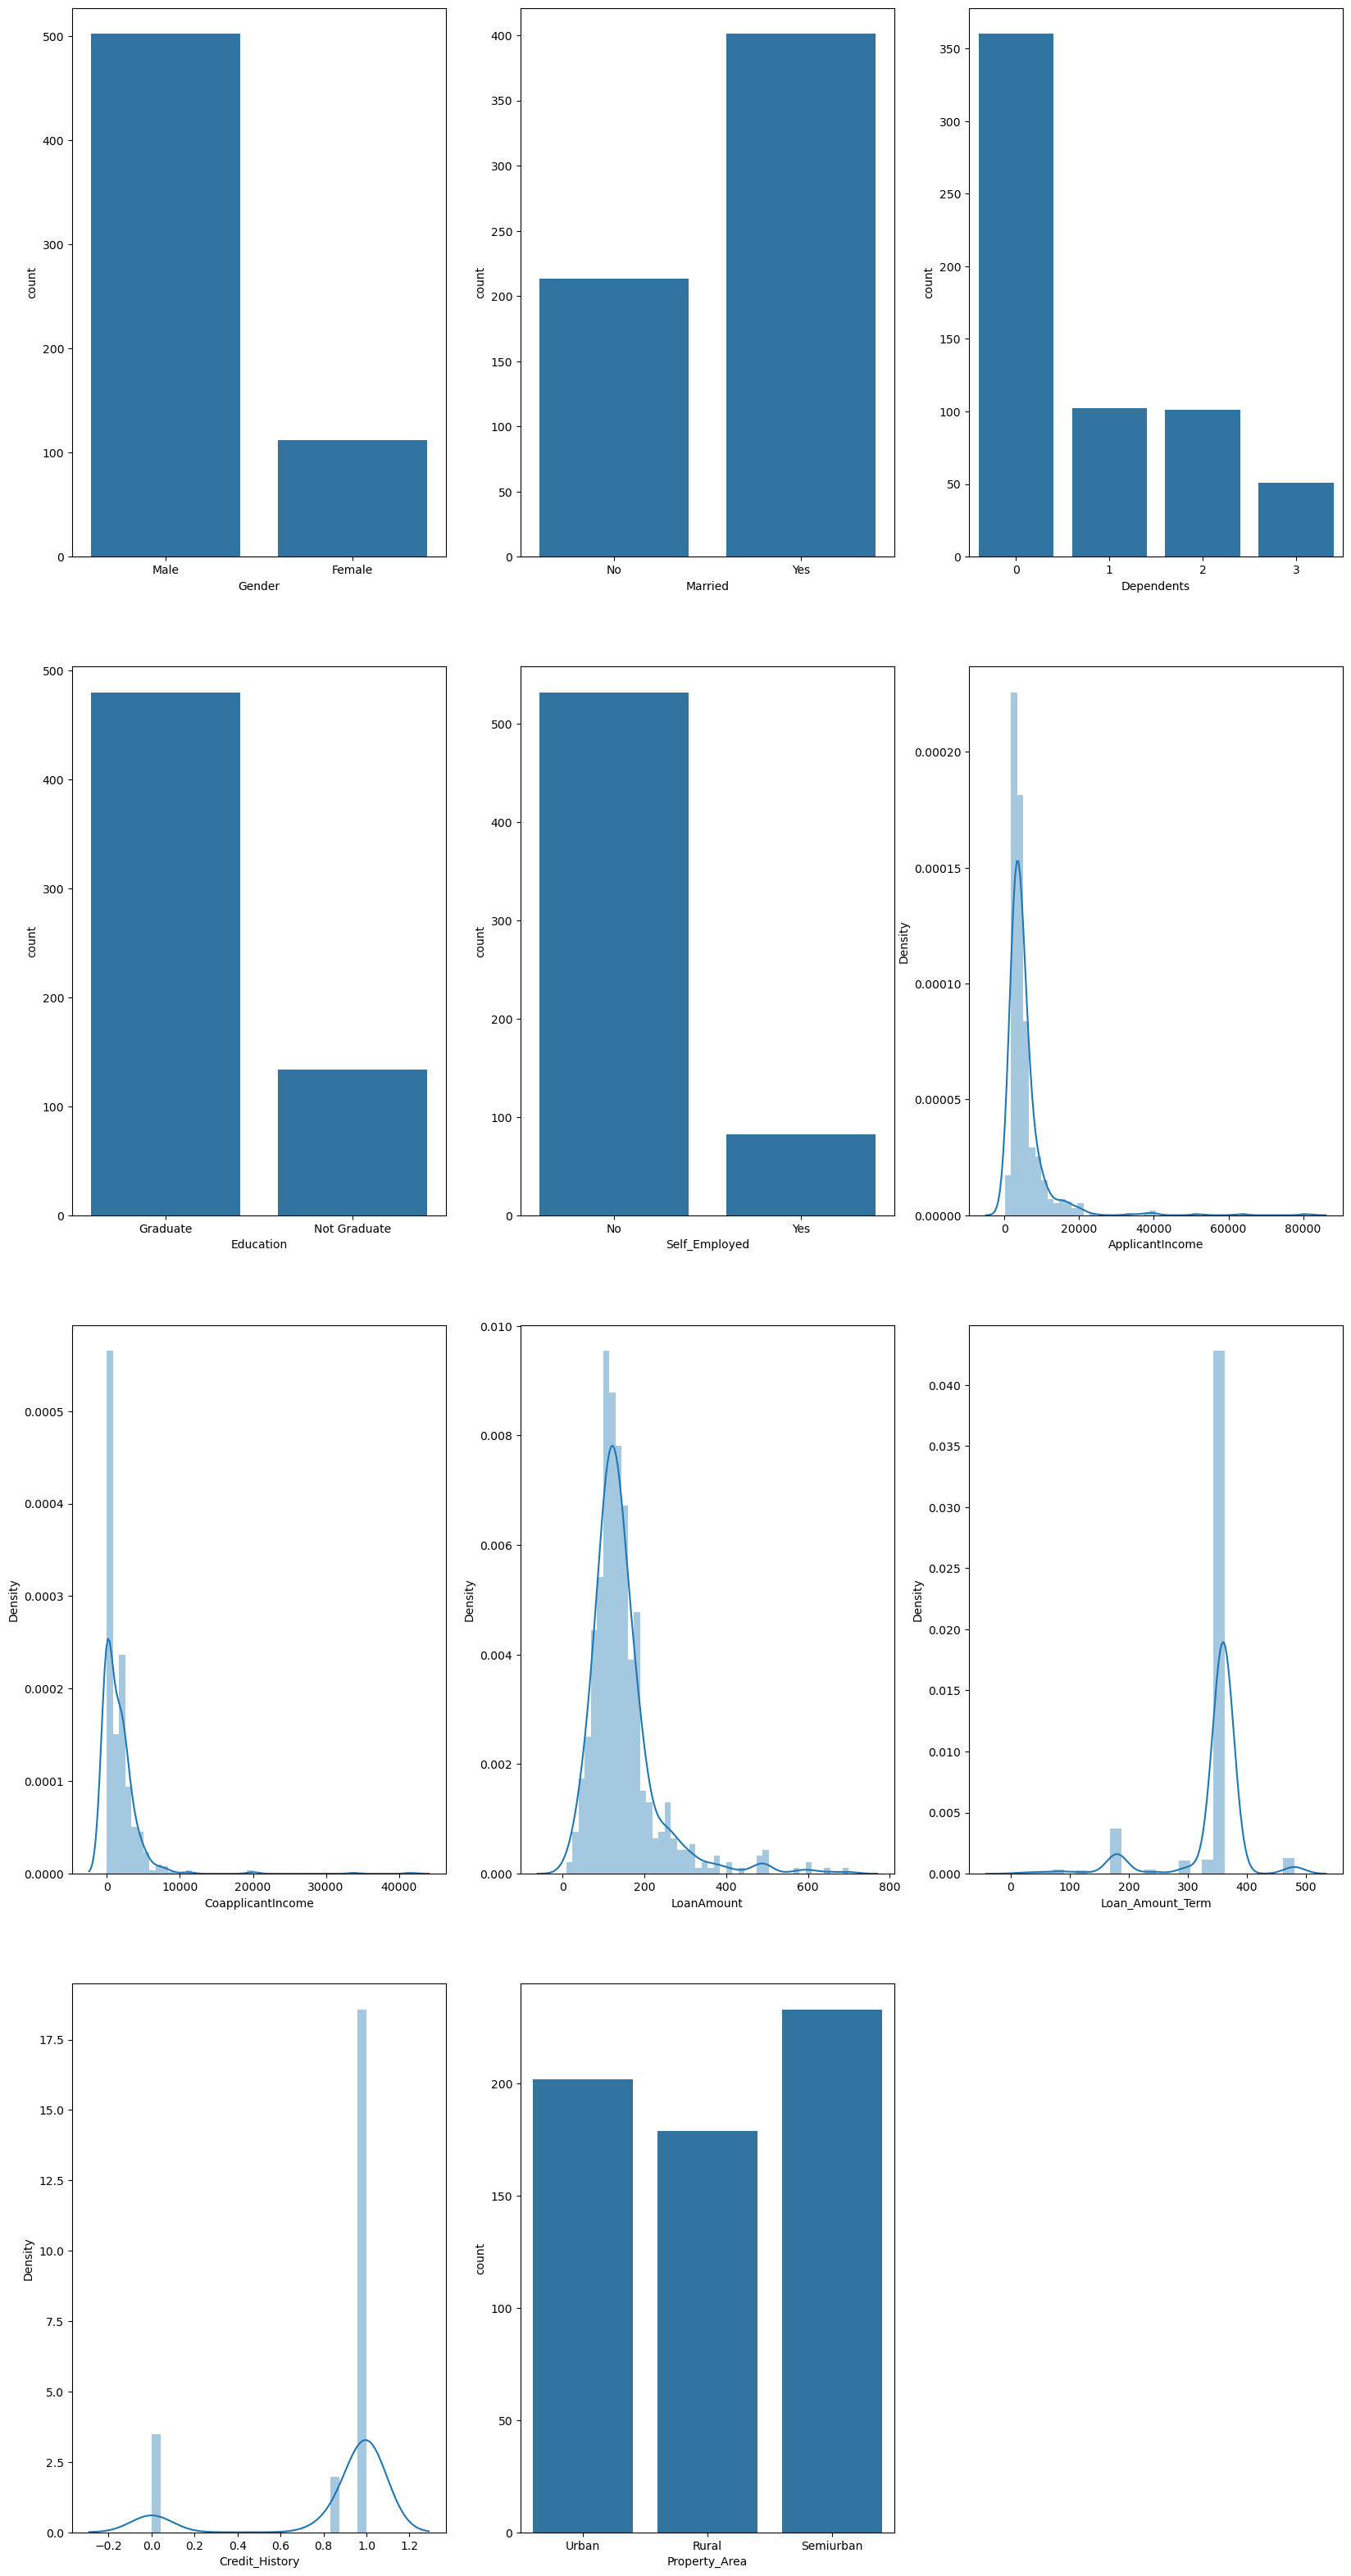

In [38]:
from ml_functions import EDA
eda = EDA()
cat,con = md.catconsep(X)
eda.univariate(X,cat,con)

## b)Bivariant

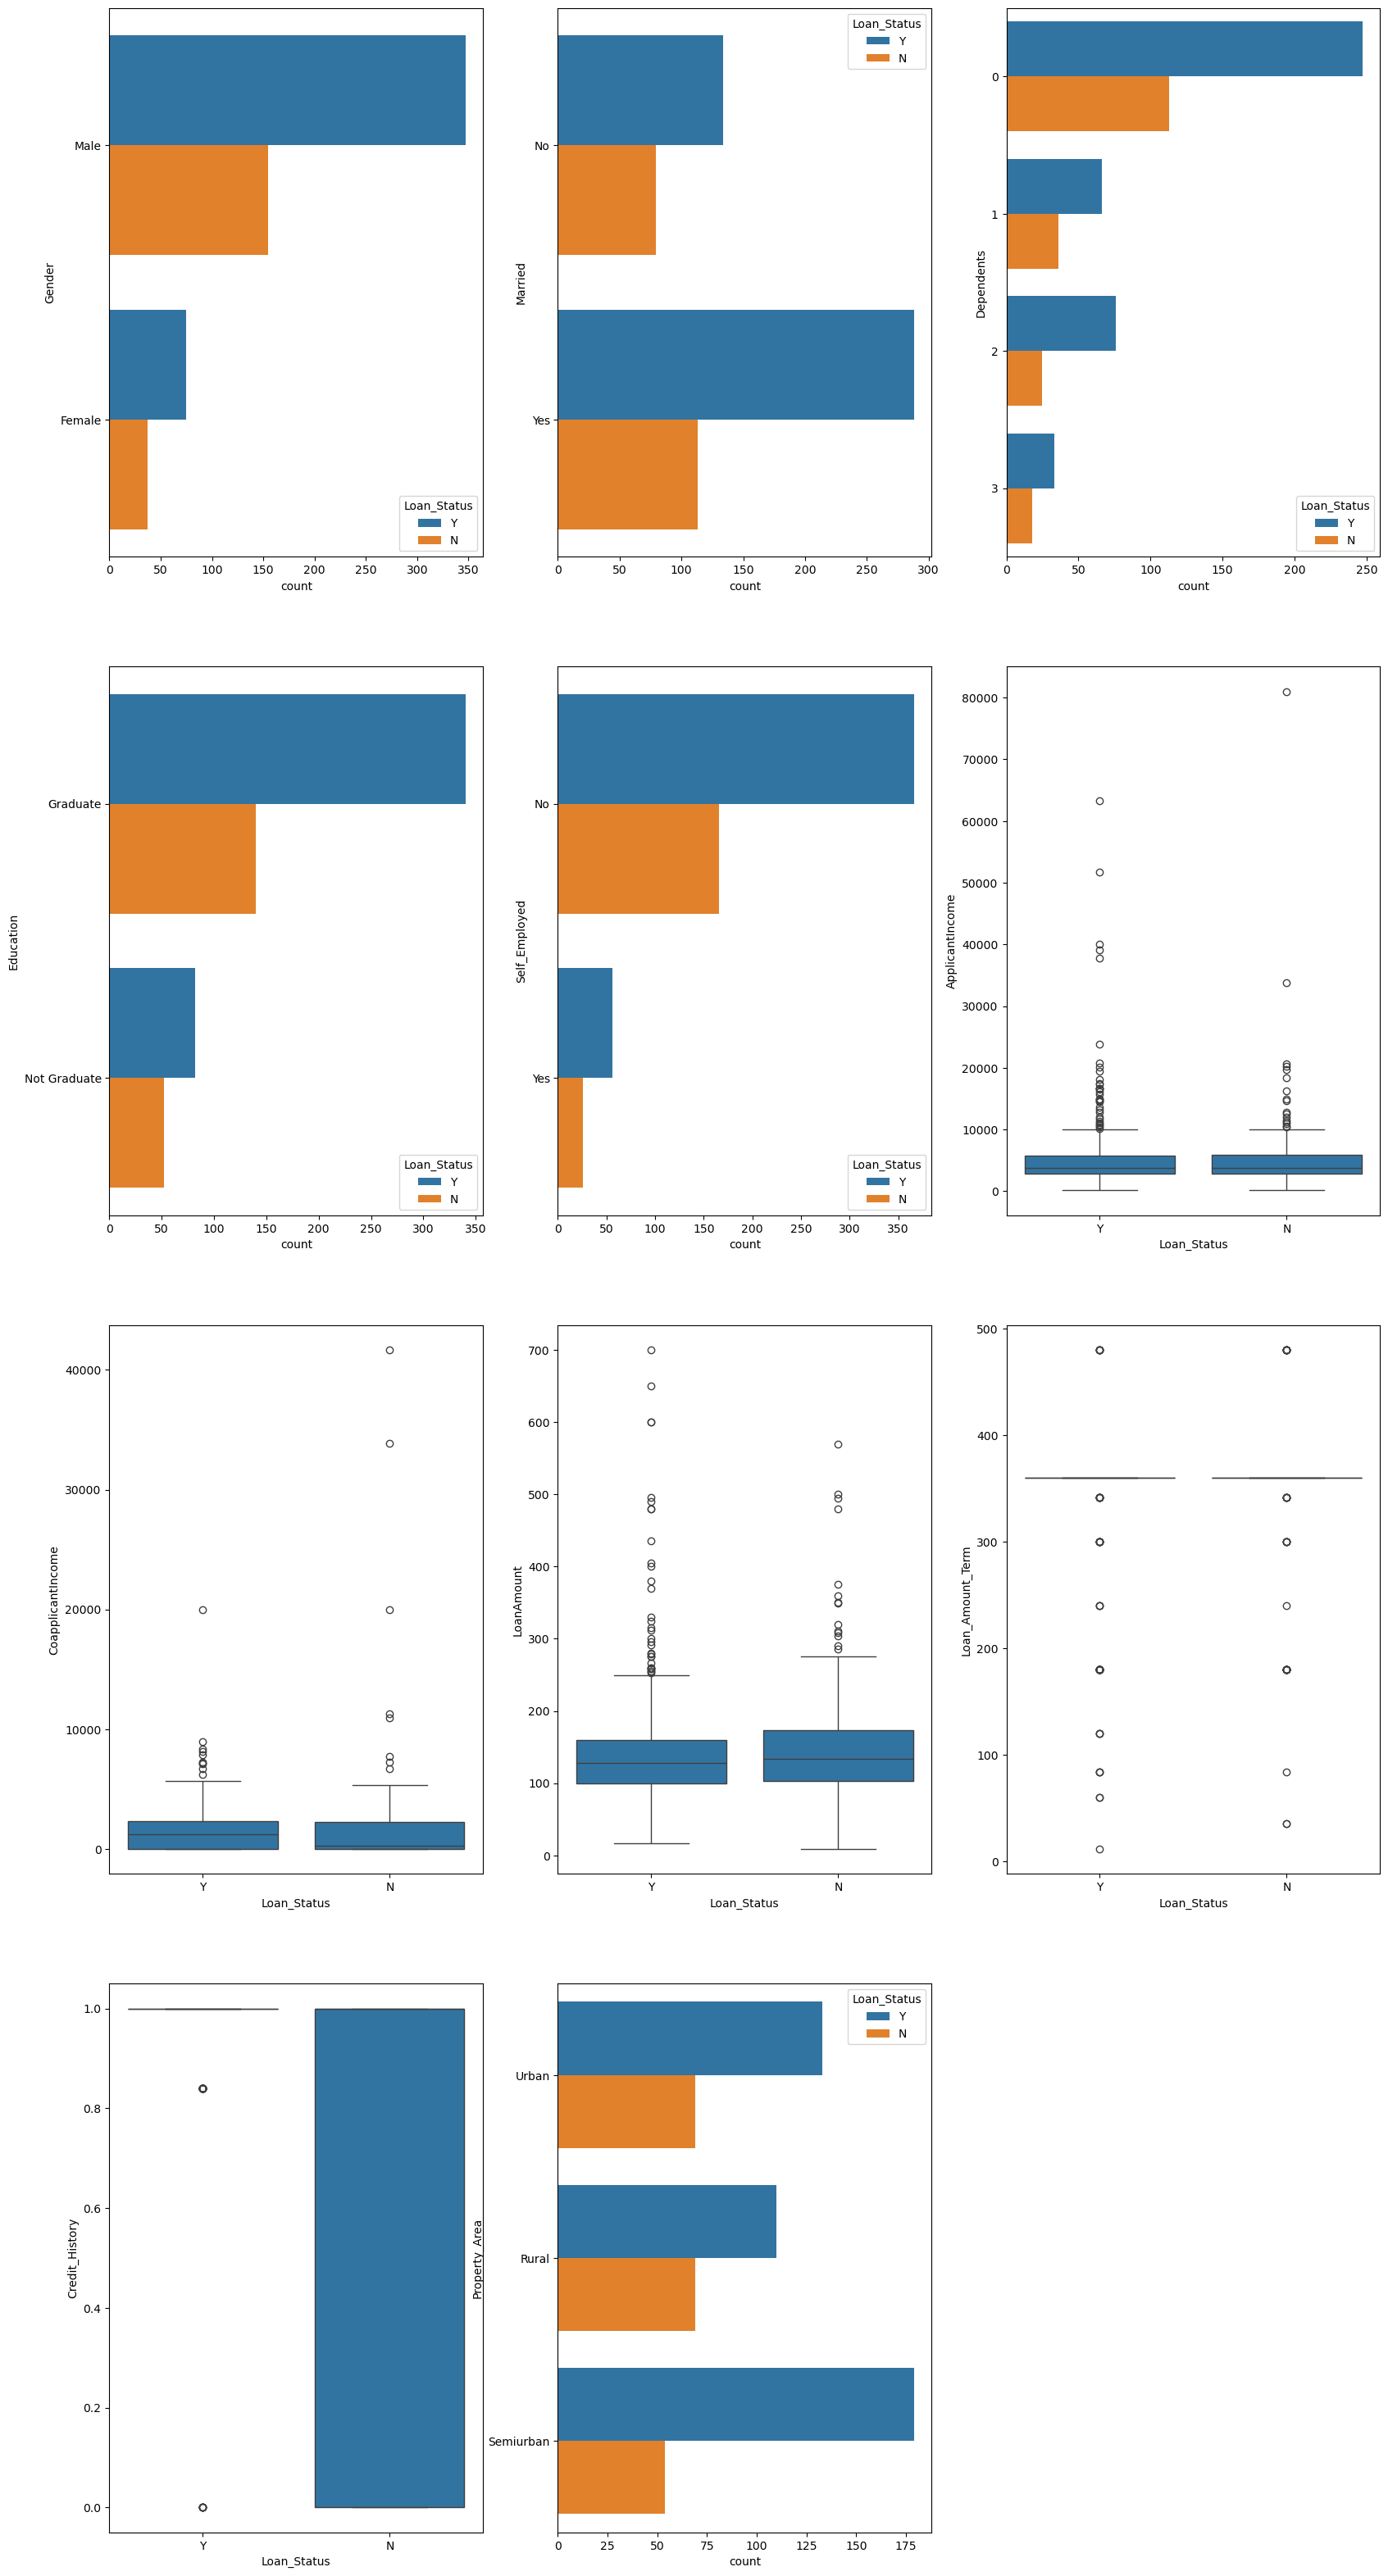

In [40]:
eda.bivariate_ycat(X,Y,cat,con)

## Data Preprocessing

In [42]:
X[cat]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [43]:
X[con]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.00,0.0,146.41,360.0,1.0
1,5405.54,1508.0,128.00,360.0,1.0
2,3000.00,0.0,66.00,360.0,1.0
3,2583.00,2358.0,120.00,360.0,1.0
4,6000.00,0.0,141.00,360.0,1.0
...,...,...,...,...,...
609,2900.00,0.0,71.00,360.0,1.0
610,4106.00,0.0,40.00,180.0,1.0
611,8072.00,240.0,253.00,360.0,1.0
612,7583.00,0.0,187.00,360.0,1.0


## a)Removing skewness

In [45]:
X[con].skew()

ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726604
Loan_Amount_Term    -2.389680
Credit_History      -1.962051
dtype: float64

In [46]:
from numpy import log, sqrt
X.CoapplicantIncome = sqrt(X.CoapplicantIncome)
X.ApplicantIncome = log(X.ApplicantIncome)
X.LoanAmount = log(X.LoanAmount)
X[con].skew()

ApplicantIncome      0.477562
CoapplicantIncome    0.980113
LoanAmount          -0.223224
Loan_Amount_Term    -2.389680
Credit_History      -1.962051
dtype: float64

## b)Preprocessing

In [54]:
X = md.preprocessing(X)

In [55]:
X.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.515465,-0.96803,0.250611,0.279851,0.452152,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.393196,0.37442,-0.020225,0.279851,0.452152,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.519896,-0.96803,-1.355202,0.279851,0.452152,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1


## c)Encoding of Y

In [59]:
Y,le = md.convert_to_labelEncoder(Y)

In [61]:
Y.head(3)

,Loan_Status
0,1
1,0
2,1


## Divide X and Y into train and test data

In [64]:
from ml_functions import Data_split
ds = Data_split()
xtrain,xtest,ytrain,ytest = ds.train_test(X,Y,32)

## Find best param using Keras Tunner

In [67]:
from keras import Sequential
from keras.layers import Dense, Dropout
import keras_tuner as kt
import tensorflow as tf

In [68]:
def model_maker_func(hp):
    model = Sequential()
    model.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))
    HLS = hp.Int("units", min_value=32, max_value=257, step=32)
    model.add(Dense(units=HLS))
    DROPOUT_LAYER_RATE = hp.Choice("rate",values=[0.1,0.15,0.2,0.25,0.3,0.35,0.4])
    model.add(Dropout(rate=DROPOUT_LAYER_RATE))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",metrics=["accuracy"])
    return model

In [69]:
import os
os.chdir("E:/Data Science/Dummy/LP-NN1")

In [70]:
tuner1 = kt.Hyperband(model_maker_func,
                     objective="val_accuracy",
                     max_epochs=10)

In [71]:
tuner1.search(xtrain,ytrain,validation_split=0.2)

Trial 30 Complete [00h 00m 05s]
val_accuracy: 0.8383838534355164

Best val_accuracy So Far: 0.8383838534355164
Total elapsed time: 00h 02m 19s


In [77]:
tuner1.get_best_hyperparameters(num_trials=1)[0].get("rate")

0.25

In [79]:
tuner1.get_best_hyperparameters(num_trials=1)[0].get("units")

128

## Create neural network using best params

In [81]:
nn1 = Sequential()
nn1.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))
nn1.add(Dense(128))
nn1.add(Dropout(0.25))
nn1.add(Dense(1,activation="sigmoid"))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=40,monitor="accuracy")

nn1.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
nn1.fit(xtrain,ytrain,validation_split=0.2,callbacks=es,epochs=500)

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5901 - loss: 0.6589 - val_accuracy: 0.8182 - val_loss: 0.4930
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8047 - loss: 0.4948 - val_accuracy: 0.8384 - val_loss: 0.4462
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7910 - loss: 0.4677 - val_accuracy: 0.8384 - val_loss: 0.4371
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8286 - loss: 0.4015 - val_accuracy: 0.8384 - val_loss: 0.4423
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8096 - loss: 0.4284 - val_accuracy: 0.8384 - val_loss: 0.4439
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8034 - loss: 0.4277 - val_accuracy: 0.8384 - val_loss: 0.4482
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8032 - loss: 0.4441 - val_accuracy: 0.8384 - val_loss: 0.4481
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8123 - loss: 0.4227 - val_accuracy: 0.8384 - 

In [83]:
nn1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,989 (226.52 KB)

 Trainable params: 19,329 (75.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,660 (151.02 KB)

## Prepare Testing data in same format as Training data for making predictions

In [86]:
B = pd.read_csv("E:/Data Science/NN Mini Project/testing_set.csv")

In [88]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [90]:
B.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [92]:
md.replacer(B)

In [94]:
B.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [96]:
dep_fil = []
for i in B.Dependents:
    i = i.replace("+","")
    dep_fil.append(i)

In [98]:
B.Dependents = dep_fil

In [100]:
B.Dependents.value_counts()

Dependents
0    210
2     59
1     58
3     40
Name: count, dtype: int64

In [102]:
B = B.drop(labels=["Loan_ID"],axis=1)

In [104]:
test_data = B

In [106]:
test_data = md.preprocessing(test_data)

In [108]:
test_data.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429367,0.270602,0.478189,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270602,0.478189,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180808,0.270602,0.478189,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [110]:
pred_test_data = nn1.predict(test_data)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [112]:
raw = []
import numpy as np
for i in pred_test_data:
        raw.append(int(np.round(i)))

In [114]:
raw = le.inverse_transform(raw)

In [116]:
B["Loan_Status"] = raw

In [118]:
B.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.00,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.00,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.00,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.83,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.00,Urban,Y


## 2. Identify customer segments from given data and categorize customer into one of the segments.

In [121]:
clust_train = A.drop(labels=["LoanAmount","Loan_Amount_Term","Loan_Status"],axis=1)

## Data Preprocessing

In [124]:
clust_train = md.preprocessing(clust_train)

In [126]:
clust_train.head(3)

,ApplicantIncome,CoapplicantIncome,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,7.265121e-02,-0.554368,0.452152,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-1.387472e-07,-0.038610,0.452152,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-3.940959e-01,-0.554368,0.452152,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1


## Applying for loop and making Elbow curve for getting best K cluster value

In [129]:
from sklearn.cluster import KMeans

WCSS = []
K = range(2,20,1)
for i in K:
    km_ser = KMeans(n_clusters=i)
    model_ser = km_ser.fit(clust_train)
    WCSS.append(model_ser.inertia_)

In [130]:
WCSS

[2820.526365731643,
 2591.0698338912825,
 2210.0047710520093,
 2008.351287633484,
 1714.1752216474529,
 1648.7151275190408,
 1579.8591730340395,
 1473.0677523297447,
 1418.0082879712172,
 1367.0651555694667,
 1327.8193775340792,
 1255.781757384918,
 1186.3598069582242,
 1164.6721045357135,
 1184.4733451040236,
 1125.9408064338736,
 1080.3401328910063,
 1055.5343518474656]

Text(0.5, 1.0, 'Elbow curve Data')

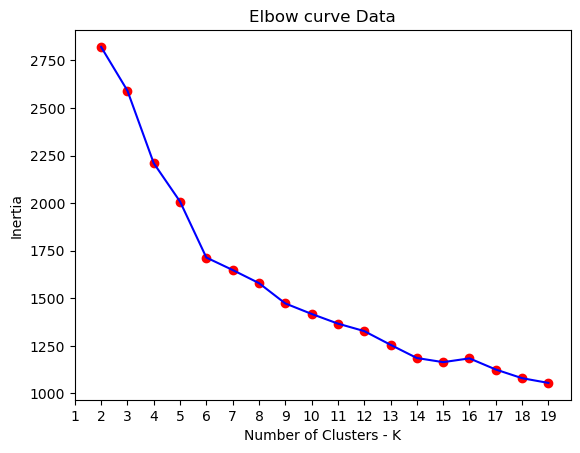

In [133]:
import matplotlib.pyplot as plt

plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="blue")
plt.xlabel("Number of Clusters - K")
plt.ylabel("Inertia")
plt.xticks(range(1,20,1))
plt.title("Elbow curve Data")

## Create model with best K value

In [136]:
km = KMeans(n_clusters=6)
model_clust = km.fit(clust_train) 

## Prepare test data as same as train data

In [139]:
test_data_clst = B.drop(labels=["LoanAmount","Loan_Amount_Term","Loan_Status"],axis=1)

In [141]:
test_data_clst = md.preprocessing(test_data_clst)

## Predict clusters of data

In [144]:
cluster = model_clust.predict(test_data_clst)

In [146]:
cluster

array([1, 1, 1, 1, 3, 1, 0, 2, 1, 3, 3, 1, 3, 2, 0, 3, 1, 1, 1, 3, 1, 0,
       3, 0, 1, 4, 1, 1, 1, 3, 0, 1, 3, 1, 1, 2, 1, 1, 3, 3, 1, 0, 1, 3,
       0, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1,
       2, 2, 1, 2, 0, 3, 1, 1, 1, 3, 1, 3, 1, 0, 2, 5, 2, 1, 2, 1, 1, 3,
       3, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 3, 2, 1, 1, 3, 0, 2, 1, 1, 1,
       0, 1, 0, 1, 1, 3, 0, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 1, 3, 1, 1, 3,
       1, 0, 3, 1, 1, 1, 3, 0, 2, 1, 2, 5, 1, 0, 3, 2, 1, 3, 3, 1, 3, 2,
       1, 3, 1, 1, 3, 1, 3, 2, 3, 0, 3, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 2, 2, 1, 3, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 3, 0, 2, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 1, 1, 3, 2, 4, 3, 1, 0, 0, 2, 2, 4, 1, 3, 3, 2,
       1, 2, 0, 2, 1, 1, 1, 3, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 3, 1,
       1, 3, 2, 0, 2, 3, 1, 0, 5, 2, 2, 1, 1, 0, 2, 5, 3, 1, 0, 3, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 2, 1, 0, 3, 3, 0, 1, 1,

In [148]:
E = B.drop(labels=["LoanAmount","Loan_Amount_Term","Loan_Status"],axis=1)

In [150]:
E["Cluster"] = cluster

In [152]:
E.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Cluster
0,Male,Yes,0,Graduate,No,5720,0,1.00,Urban,1
1,Male,Yes,1,Graduate,No,3076,1500,1.00,Urban,1
2,Male,Yes,2,Graduate,No,5000,1800,1.00,Urban,1
3,Male,Yes,2,Graduate,No,2340,2546,0.83,Urban,1
4,Male,No,0,Not Graduate,No,3276,0,1.00,Urban,3


In [154]:
E.groupby(by="Cluster")["Cluster"].count()

Cluster
0     52
1    179
2     58
3     70
4      4
5      4
Name: Cluster, dtype: int64

In [178]:
cls_name = { 
    0:"Female Good Credit History",
    1:"Good Applicant Income and Credit History",
    2:"Bad Credit History",
    3:"Good Applicant Income and Credit History",
    4:"Good Coapplicant Income and not Self Employed",
    5:"Highest Applicant Income and Good Credit History"
}

In [180]:
tag_clu = []
for i in E.Cluster:
    tag_clu.append(cls_name[i])
    
E["Customer Segmentation"] = tag_clu

In [182]:
E.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Cluster,Customer Segmentation
0,Male,Yes,0,Graduate,No,5720,0,1.00,Urban,1,Good Applicant Income and Credit History
1,Male,Yes,1,Graduate,No,3076,1500,1.00,Urban,1,Good Applicant Income and Credit History
2,Male,Yes,2,Graduate,No,5000,1800,1.00,Urban,1,Good Applicant Income and Credit History
3,Male,Yes,2,Graduate,No,2340,2546,0.83,Urban,1,Good Applicant Income and Credit History
4,Male,No,0,Not Graduate,No,3276,0,1.00,Urban,3,Good Applicant Income and Credit History


## 3. If customer is not eligible for the input required amount and duration:

## a. What can be amount for the given duration.

## Get data which have Loan_Status is yes

In [187]:
train_data1 = A[A["Loan_Status"]=="Y"]

## Indexing properly

In [190]:
len_train_data1 = train_data1.shape[0]
train_data1.index = range(0,len_train_data1,1)

## Removing unwanted columns

In [193]:
train_data1 = train_data1.drop(labels="Loan_Status",axis=1)

## Decrale X and Y

In [196]:
X = train_data1.drop(labels=["LoanAmount"],axis=1)
Y = train_data1[["LoanAmount"]]

## Data Preprocessing

In [199]:
cat,con = md.catconsep(X)

In [201]:
X[con].skew()

ApplicantIncome      5.500304
CoapplicantIncome    3.042653
Loan_Amount_Term    -2.619580
Credit_History      -6.403561
dtype: float64

In [203]:
X["CoapplicantIncome"] = sqrt(X["CoapplicantIncome"])
X["ApplicantIncome"] = sqrt(X["ApplicantIncome"])

In [205]:
X[con].skew()

ApplicantIncome      2.768685
CoapplicantIncome    0.351333
Loan_Amount_Term    -2.619580
Credit_History      -6.403561
dtype: float64

In [207]:
X = md.preprocessing(X)

In [209]:
xtrain,xtest,ytrain,ytest = ds.train_test(X,Y,32)

## Find best params using keras tunner

In [211]:
def model_builder2(hp):
    
    tuning_grid = [0.1,0.13,0.15,0.2,0.23,0.25,0.3,0.33,0.35,0.4,0.43,0.45]
    model = Sequential()
    model.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))
    
    HLS1 = hp.Int("units1", min_value=32, max_value=400, step=10)
    model.add(Dense(units=HLS1,activation="relu"))
    
    DROPOUT_LAYER_RATE1 = hp.Choice("rate1",values= tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE1))
    
    HLS2 = hp.Int("units2", min_value=32, max_value=400, step=10)
    model.add(Dense(units=HLS2,activation="relu"))
    
    DROPOUT_LAYER_RATE2 = hp.Choice("rate2",values=tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE2))
    
    HLS3 = hp.Int("units3", min_value=32, max_value=400, step=50)
    model.add(Dense(units=HLS3,activation="relu"))
    
    DROPOUT_LAYER_RATE3 = hp.Choice("rate3",values=tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE3))
    
    
    model.add(Dense(1,activation="relu"))
    
    model.compile(loss="MeanAbsoluteError",metrics=["mae"])
    
    return model

In [212]:
import os
os.chdir("E:/Data Science/Dummy/LP-NN2/")

In [216]:
tuner2 = kt.Hyperband(model_builder2,
                     objective='mae',
                     max_epochs=10)

In [218]:
tuner2.search(xtrain,ytrain,validation_split=0.2)

Trial 30 Complete [00h 00m 08s]
mae: 39.23902130126953

Best mae So Far: 36.77543640136719
Total elapsed time: 00h 02m 58s


In [220]:
print("Hidden Layer 1: ",tuner2.get_best_hyperparameters(num_trials=1)[0].get("units1"))
print("Dropout Layer 1: ",tuner2.get_best_hyperparameters(num_trials=1)[0].get("rate1"))
print("Hidden Layer 2: ",tuner2.get_best_hyperparameters(num_trials=1)[0].get("units2"))
print("Dropout Layer 2: ",tuner2.get_best_hyperparameters(num_trials=1)[0].get("rate2"))
print("Hidden Layer 3: ",tuner2.get_best_hyperparameters(num_trials=1)[0].get("units3"))
print("Dropout Layer 3: ",tuner2.get_best_hyperparameters(num_trials=1)[0].get("rate3"))

Hidden Layer 1:  322
Dropout Layer 1:  0.33
Hidden Layer 2:  212
Dropout Layer 2:  0.15
Hidden Layer 3:  182
Dropout Layer 3:  0.13


## Create Neural Network using best param of tuner1

In [222]:
nn2 = Sequential()

nn2.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))

nn2.add(Dense(322,activation="relu"))
nn2.add(Dropout(0.33))
nn2.add(Dense(212,activation="relu"))
nn2.add(Dropout(0.15))
nn2.add(Dense(182,activation="relu"))
nn2.add(Dropout(0.13))


nn2.add(Dense(1,activation="relu"))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=50,monitor="mae")

nn2.compile(optimizer="Adam",loss="MeanAbsoluteError",metrics=["mae"])
nn2.fit(xtrain,ytrain,validation_split=0.2,callbacks=es,epochs=600)

Epoch 1/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 146.9310 - mae: 146.9310 - val_loss: 143.3744 - val_mae: 143.3744
Epoch 2/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 140.5452 - mae: 140.5452 - val_loss: 98.8733 - val_mae: 98.8733
Epoch 3/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 78.9948 - mae: 78.9948 - val_loss: 55.6961 - val_mae: 55.6961
Epoch 4/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 55.5069 - mae: 55.5069 - val_loss: 49.5785 - val_mae: 49.5785
Epoch 5/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 42.8318 - mae: 42.8318 - val_loss: 43.2348 - val_mae: 43.2348
Epoch 6/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.1674 - mae: 40.1674 - val_loss: 42.0468 - val_mae: 42.0468
Epoch 7/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 38.9355 - mae: 38.9355 - val_loss: 39.9970 - val_mae: 39.9970
Epoch 8/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 36.6509 - mae: 36.6509 - val_loss: 39.6313 - val_mae: 39.6313
Epoch 9/600
9/9 ━━━━━━━━━━━━━━━━━━

## Prepare test data same as training data

In [224]:
test_data2 = B[B["Loan_Status"]=='N']
test_data2_len = test_data2.shape[0]
test_data2.index = range(0,test_data2_len,1)

In [226]:
test_data2 = test_data2.drop(labels=["LoanAmount","Loan_Status"],axis=1)

In [228]:
test_data2 = md.preprocessing(test_data2)

In [230]:
predicted_nn2 = nn2.predict(test_data2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step


In [231]:
predicted_nn2[0]

array([60.994686], dtype=float32)

In [234]:
import numpy as np
pred_la = []
for i in predicted_nn2:
    pred_la.append(round(i[0]))

In [236]:
C = B[B["Loan_Status"]=="N"]
len_C = C.shape[0]
C.index = range(0,len_C,1)

In [238]:
C = C.drop(labels=["LoanAmount","Loan_Status"],axis=1)

In [240]:
C["LoanAmount"] = pred_la

In [242]:
C.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount
0,Male,Yes,0,Not Graduate,Yes,2165,3422,360.0,1.0,Urban,61
1,Male,Yes,2,Not Graduate,No,3881,0,360.0,0.0,Rural,111
2,Male,Yes,2,Graduate,No,12173,0,360.0,0.0,Semiurban,307
3,Male,No,1,Graduate,No,5667,0,360.0,1.0,Urban,120
4,Male,No,0,Graduate,No,0,24000,360.0,0.0,Rural,98


## b. If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

In [245]:
train_data2 = A[(A["Loan_Status"]=="Y") & (A["Loan_Amount_Term"]>240.0)]

## Indexing

In [248]:
len_train_data2 = train_data2.shape[0]
train_data2.index = range(0,len_train_data2,1)

## Drop Unnecessary Columns

In [251]:
train_data2 = train_data2.drop(labels=["Loan_Status"],axis=1)

In [253]:
X = train_data2.drop(labels=["Loan_Amount_Term"],axis=1)
Y = train_data2[["Loan_Amount_Term"]]

## Convert Dependents columns into continuous

In [256]:
dep1 = []
for i in X.Dependents:
    dep1.append(int(i))

X["Dependents"] = dep1

In [258]:
loan_term = []
for i in Y.Loan_Amount_Term:
    loan_term.append(int(i))
    
Y["Loan_Amount_Term"] = loan_term

## Data Preprocessing

In [261]:
cat, con = md.catconsep(X)

In [263]:
X[con].skew()

Dependents           1.018780
ApplicantIncome      4.759015
CoapplicantIncome    3.163921
LoanAmount           3.026631
Credit_History      -6.938382
dtype: float64

In [265]:
X.ApplicantIncome = log(X.ApplicantIncome)
X.CoapplicantIncome = sqrt(X.CoapplicantIncome)
X.LoanAmount = log(X.LoanAmount)
X.Dependents = sqrt(X.Dependents)

In [267]:
X[con].skew()

Dependents           0.608876
ApplicantIncome      0.532392
CoapplicantIncome    0.303109
LoanAmount           0.151099
Credit_History      -6.938382
dtype: float64

In [269]:
cat.remove("Property_Area")

In [271]:
cat

['Gender', 'Married', 'Education', 'Self_Employed']

In [273]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

lb1 = LabelEncoder()
ss1 = StandardScaler()
X1 = pd.DataFrame(lb1.fit_transform(X["Gender"]),columns=["Gender"])
X2 = pd.DataFrame(lb1.fit_transform(X["Property_Area"]),columns=["Property_Area"])
X3 = X1.join(X2)
X4 = pd.DataFrame(lb1.fit_transform(X["Married"]),columns=["Married"])
X5 = pd.DataFrame(lb1.fit_transform(X["Education"]),columns=["Education"])
X6 = X4.join(X5)
X7 = pd.DataFrame(lb1.fit_transform(X["Self_Employed"]),columns=["Self_Employed"])
X8 = X6.join(X7)
X9 = X8.join(X3)
X10 = pd.DataFrame(ss1.fit_transform(X[con]),columns=con)
X = X10.join(X9)

In [275]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed,Gender,Property_Area
0,-0.787736,0.565930,-1.094153,0.262813,0.226335,0,0,0,1,2
1,-0.787736,-0.519547,-1.094153,-1.464057,0.226335,1,0,1,1,2
2,-0.787736,-0.762865,0.737107,-0.168320,0.226335,1,1,0,1,2
3,-0.787736,0.607370,-1.094153,0.181209,0.226335,0,0,0,1,2
4,1.327463,0.441185,1.348691,1.565054,0.226335,1,0,1,1,2


In [277]:
xtrain,xtest,ytrain,ytest = ds.train_test(X,Y,32)

## Finding best param for nn3

In [280]:
def model_builder3(hp):
    
    tuning_grid = [0.1,0.13,0.15,0.2,0.23,0.25,0.3,0.33,0.35,0.4,0.43,0.45]
    model = Sequential()
    model.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))
    
    HLS1 = hp.Int("units1", min_value=32, max_value=400, step=10)
    model.add(Dense(units=HLS1,activation="relu"))
    
    DROPOUT_LAYER_RATE1 = hp.Choice("rate1",values= tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE1))
    
    HLS2 = hp.Int("units2", min_value=32, max_value=400, step=10)
    model.add(Dense(units=HLS2,activation="relu"))
    
    DROPOUT_LAYER_RATE2 = hp.Choice("rate2",values=tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE2))
    
    HLS3 = hp.Int("units3", min_value=32, max_value=400, step=50)
    model.add(Dense(units=HLS3,activation="relu"))
    
    DROPOUT_LAYER_RATE3 = hp.Choice("rate3",values=tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE3))
    
    
    model.add(Dense(1,activation="relu"))
    
    model.compile(loss="MeanAbsoluteError",metrics=["mae"])
    
    return model

In [282]:
import os
os.chdir("E:/Data Science/Dummy/LP-NN3/")

In [284]:
tuner3 = kt.Hyperband(model_builder3,
                     objective='mae',
                     max_epochs=10)

In [286]:
tuner3.search(xtrain,ytrain,validation_split=0.2)

Trial 30 Complete [00h 00m 09s]
mae: 52.05070114135742

Best mae So Far: 41.874454498291016
Total elapsed time: 00h 03m 21s


In [288]:
print("Hidden Layer 1: ",tuner3.get_best_hyperparameters(num_trials=1)[0].get("units1"))
print("Dropout Layer 1: ",tuner3.get_best_hyperparameters(num_trials=1)[0].get("rate1"))
print("Hidden Layer 2: ",tuner3.get_best_hyperparameters(num_trials=1)[0].get("units2"))
print("Dropout Layer 2: ",tuner3.get_best_hyperparameters(num_trials=1)[0].get("rate2"))
print("Hidden Layer 3: ",tuner3.get_best_hyperparameters(num_trials=1)[0].get("units3"))
print("Dropout Layer 3: ",tuner3.get_best_hyperparameters(num_trials=1)[0].get("rate3"))

Hidden Layer 1:  292
Dropout Layer 1:  0.15
Hidden Layer 2:  72
Dropout Layer 2:  0.1
Hidden Layer 3:  382
Dropout Layer 3:  0.1


In [290]:
nn3 = Sequential()

nn3.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))

nn3.add(Dense(292,activation="relu"))
nn3.add(Dropout(0.15))
nn3.add(Dense(72,activation="relu"))
nn3.add(Dropout(0.1))
nn3.add(Dense(382,activation="relu"))
nn3.add(Dropout(0.1))


nn3.add(Dense(1,activation="relu"))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=50,monitor="mae")

nn3.compile(optimizer="Adam",loss="MeanAbsoluteError",metrics=["mae"])
nn3.fit(xtrain,ytrain,validation_split=0.2,callbacks=es,epochs=600)

Epoch 1/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 359.0356 - mae: 359.0356 - val_loss: 358.4594 - val_mae: 358.4594
Epoch 2/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 355.6763 - mae: 355.6763 - val_loss: 344.4931 - val_mae: 344.4931
Epoch 3/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 333.1947 - mae: 333.1947 - val_loss: 288.6299 - val_mae: 288.6299
Epoch 4/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 253.6276 - mae: 253.6276 - val_loss: 105.6605 - val_mae: 105.6605
Epoch 5/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 98.7548 - mae: 98.7548 - val_loss: 82.2675 - val_mae: 82.2675
Epoch 6/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 74.8782 - mae: 74.8782 - val_loss: 66.1989 - val_mae: 66.1989
Epoch 7/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 71.2736 - mae: 71.2736 - val_loss: 45.9004 - val_mae: 45.9004
Epoch 8/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 55.7548 - mae: 55.7548 - val_loss: 42.2533 - val_mae: 42.2533
Epoch 9/600
8/8 ━━━━━━━━

## Prepare Testing data for nn3

In [292]:
test_data3 = B[(B["Loan_Status"]=="N") & (B["Loan_Amount_Term"]<=240)]

## Indexing

In [295]:
len_test_data3 = test_data3.shape[0]
test_data3.index = range(0,len_test_data3,1)

## Delete unwanted columns

In [298]:
test_data3 = test_data3.drop(labels=["Loan_Status","Loan_Amount_Term"],axis=1)

## Convert Dependents columns type into continuous

In [301]:
test_dep = []
for i in test_data3.Dependents:
    test_dep.append(int(i))
    
test_data3["Dependents"] = test_dep

## Data Preprocessing

In [304]:
cat,con = md.catconsep(test_data3)

In [306]:
cat.remove("Property_Area")
cat

['Gender', 'Married', 'Education', 'Self_Employed']

In [308]:
input1 = pd.DataFrame(lb1.fit_transform(X["Property_Area"]),columns=["Property_Area"])
input2 = pd.DataFrame(lb1.fit_transform(test_data3["Gender"]),columns=["Gender"])
out1 = input2.join(input1)
input3 = pd.DataFrame(lb1.fit_transform(test_data3["Self_Employed"]),columns=["Self_Employed"])
input4 = pd.DataFrame(lb1.fit_transform(test_data3["Education"]),columns=["Education"])
out2 = input4.join(input3)
input5 = pd.DataFrame(lb1.fit_transform(test_data3["Married"]),columns=["Married"])
out3 = input5.join(out2)
out4 = out3.join(out1)

In [310]:
x_con = pd.DataFrame(ss1.fit_transform(test_data3[con]),columns=con)

test_data3 = x_con.join(out4)

In [312]:
test_data3

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed,Gender,Property_Area
0,-0.742781,1.205370,-1.321618,0.412355,-0.889707,1,0,0,0,2
1,0.092848,-0.241225,0.150527,-1.219290,0.845570,0,0,0,0,2
2,-0.742781,-0.426018,0.445578,1.308160,-0.889707,0,0,0,0,2
3,-0.742781,-0.234423,0.631925,1.020222,-0.889707,1,0,0,0,2
4,-0.742781,-0.587002,0.179101,-0.739395,-0.889707,0,0,0,0,2
5,0.092848,-1.170855,0.762368,-0.995339,1.200988,1,0,1,0,2
6,-0.742781,-0.872694,1.679198,0.124417,1.200988,1,0,1,0,2
7,1.764106,0.146499,-1.321618,-1.187297,1.200988,1,1,0,0,2
8,1.764106,2.180348,-1.205461,1.276167,-0.889707,1,1,0,0,2


## Predicting Loan Amount Term

In [315]:
predicted_nn3 = nn3.predict(test_data3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


In [317]:
la_term = []
for i in predicted_nn3:
    la_term.append(round(i[0]))

In [319]:
la_term

[367, 361, 359, 382, 356, 358, 353, 404, 355]

In [321]:
D = B[(B["Loan_Status"]=="N") & (B["Loan_Amount_Term"]<=240)]

In [323]:
len_D = D.shape[0]
D.index = range(0,len_D,1)

In [325]:
D = D.drop(labels=["Loan_Amount_Term","Loan_Status"],axis=1)

In [327]:
D["Loan_Amount_Term"] = la_term

In [329]:
D

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Amount_Term
0,Male,Yes,0,Graduate,No,4456,0,131.0,0.00,Semiurban,367
1,Male,No,1,Graduate,No,3180,2370,80.0,0.83,Rural,361
2,Male,No,0,Graduate,No,3017,2845,159.0,0.00,Urban,359
3,Male,Yes,0,Graduate,No,3186,3145,150.0,0.00,Semiurban,382
4,Male,No,0,Graduate,No,2875,2416,95.0,0.00,Semiurban,356
5,Male,Yes,1,Graduate,Yes,2360,3355,87.0,1.00,Rural,358
6,Male,Yes,0,Graduate,Yes,2623,4831,122.0,1.00,Semiurban,353
7,Male,Yes,3,Not Graduate,No,3522,0,81.0,1.00,Rural,404
8,Male,Yes,3,Not Graduate,No,5316,187,158.0,0.00,Semiurban,355
